In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from helpers import *

In [2]:
data_folder = "C:/Users/cricl/PROJADA/"

In [3]:
movie_col_name = [
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countries", 
    "Movie_genres",
    "Actor_gender",
    "Actor_height_m",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_movie_release",
    "Main_genre",
    "Main_country"    ] 


In [110]:
df = pd.read_csv(data_folder+'Big_Cleaned_dataset.csv', usecols=movie_col_name)
df.shape
test = df.Main_country
a=test.value_counts()
for country,count in a.items():
    print(f"{country}:{count}")

United States of America:134089
India:14376
France:9734
United Kingdom:9557
Japan:5788
Italy:2259
Canada:2127
South Korea:1845
Hong Kong:1786
Germany:1455
Spain:1331
Sweden:1208
Australia:1162
Denmark:1101
Netherlands:1057
Philippines:786
Mexico:644
West Germany:635
Soviet Union:533
Poland:455
Finland:450
England:424
Argentina:412
Norway:390
Yugoslavia:365
Hungary:344
Austria:340
Ireland:294
Turkey:288
Switzerland:281
Russia:242
Brazil:241
Czech Republic:233
China:212
Pakistan:211
Weimar Republic:195
Czechoslovakia:185
Belgium:173
Thailand:153
South Africa:123
Portugal:109
German Democratic Republic:103
Malaysia:102
Indonesia:101
Bulgaria:95
Iceland:93
Serbia:90
Croatia:90
Singapore:83
Egypt:79
Slovenia:63
Romania:63
Slovakia:63
New Zealand:61
Kingdom of Great Britain:51
Greece:46
Israel:41
Iran:39
Ukraine:26
Serbia and Montenegro:26
Sri Lanka:25
Bangladesh:24
Estonia:23
Korea:21
Luxembourg:20
Taiwan:18
Puerto Rico:17
United Arab Emirates:14
Afghanistan:13
Albania:13
Republic of Macedo

In [5]:
'''threshold = 100
for i in df["Main_country"].unique():
    values = df[df.Main_country== i]["Main_country"].value_counts()
    if values.values< threshold:
        df = df[df.Main_country != i]
df.shape
#df["Main_country"].value_counts()'''

'threshold = 100\nfor i in df["Main_country"].unique():\n    values = df[df.Main_country== i]["Main_country"].value_counts()\n    if values.values< threshold:\n        df = df[df.Main_country != i]\ndf.shape\n#df["Main_country"].value_counts()'

In [6]:
def remove_outlier(df, col_name,threshold):
    for i in df[col_name].unique():
        values = df[df[col_name]== i][col_name].value_counts()
        if values.values< threshold:
            df = df[df[col_name] != i]
    return df


In [7]:
threshold = 100
col_name = "Main_country"
df = remove_outlier(df,col_name,threshold)

df.shape

(197899, 14)

In [8]:

America = ['Canada','United States of America','Mexico','Argentina','Brazil']
Europa= ['United Kingdom','France','Germany','Poland','Finland','Hungary','Spain','Italy','Finland',
'Ireland','Denmark','Sweden','Norway','Netherlands','Czech Republic', 'Switzerland','Portugal','Belgium', 'Austria','England']
Asia = ['India','Japan','Hong Kong','South Korea','Pakistan','Turkey','Philippines','Russia', 'Thailand', 'Malaysia', 'China',
       'Indonesia']
Africa = ['South Africa']
Oceania = ['Australia']
Deadcountries = ['Soviet Union','Yugoslavia','West Germany','Weimar Republic','Czechoslovakia', 'German Democratic Republic']
df["Main_country"].isnull().any()
'''
for i in Asia:
    print(df[df.Main_country == i].Main_country.count())
'''

'\nfor i in Asia:\n    print(df[df.Main_country == i].Main_country.count())\n'

In [9]:
df = df[~df['Main_country'].isin(Deadcountries)]
'''
for i in Deadcountries:
    print(df[df.Main_country == i].Main_country.count())
'''

'\nfor i in Deadcountries:\n    print(df[df.Main_country == i].Main_country.count())\n'

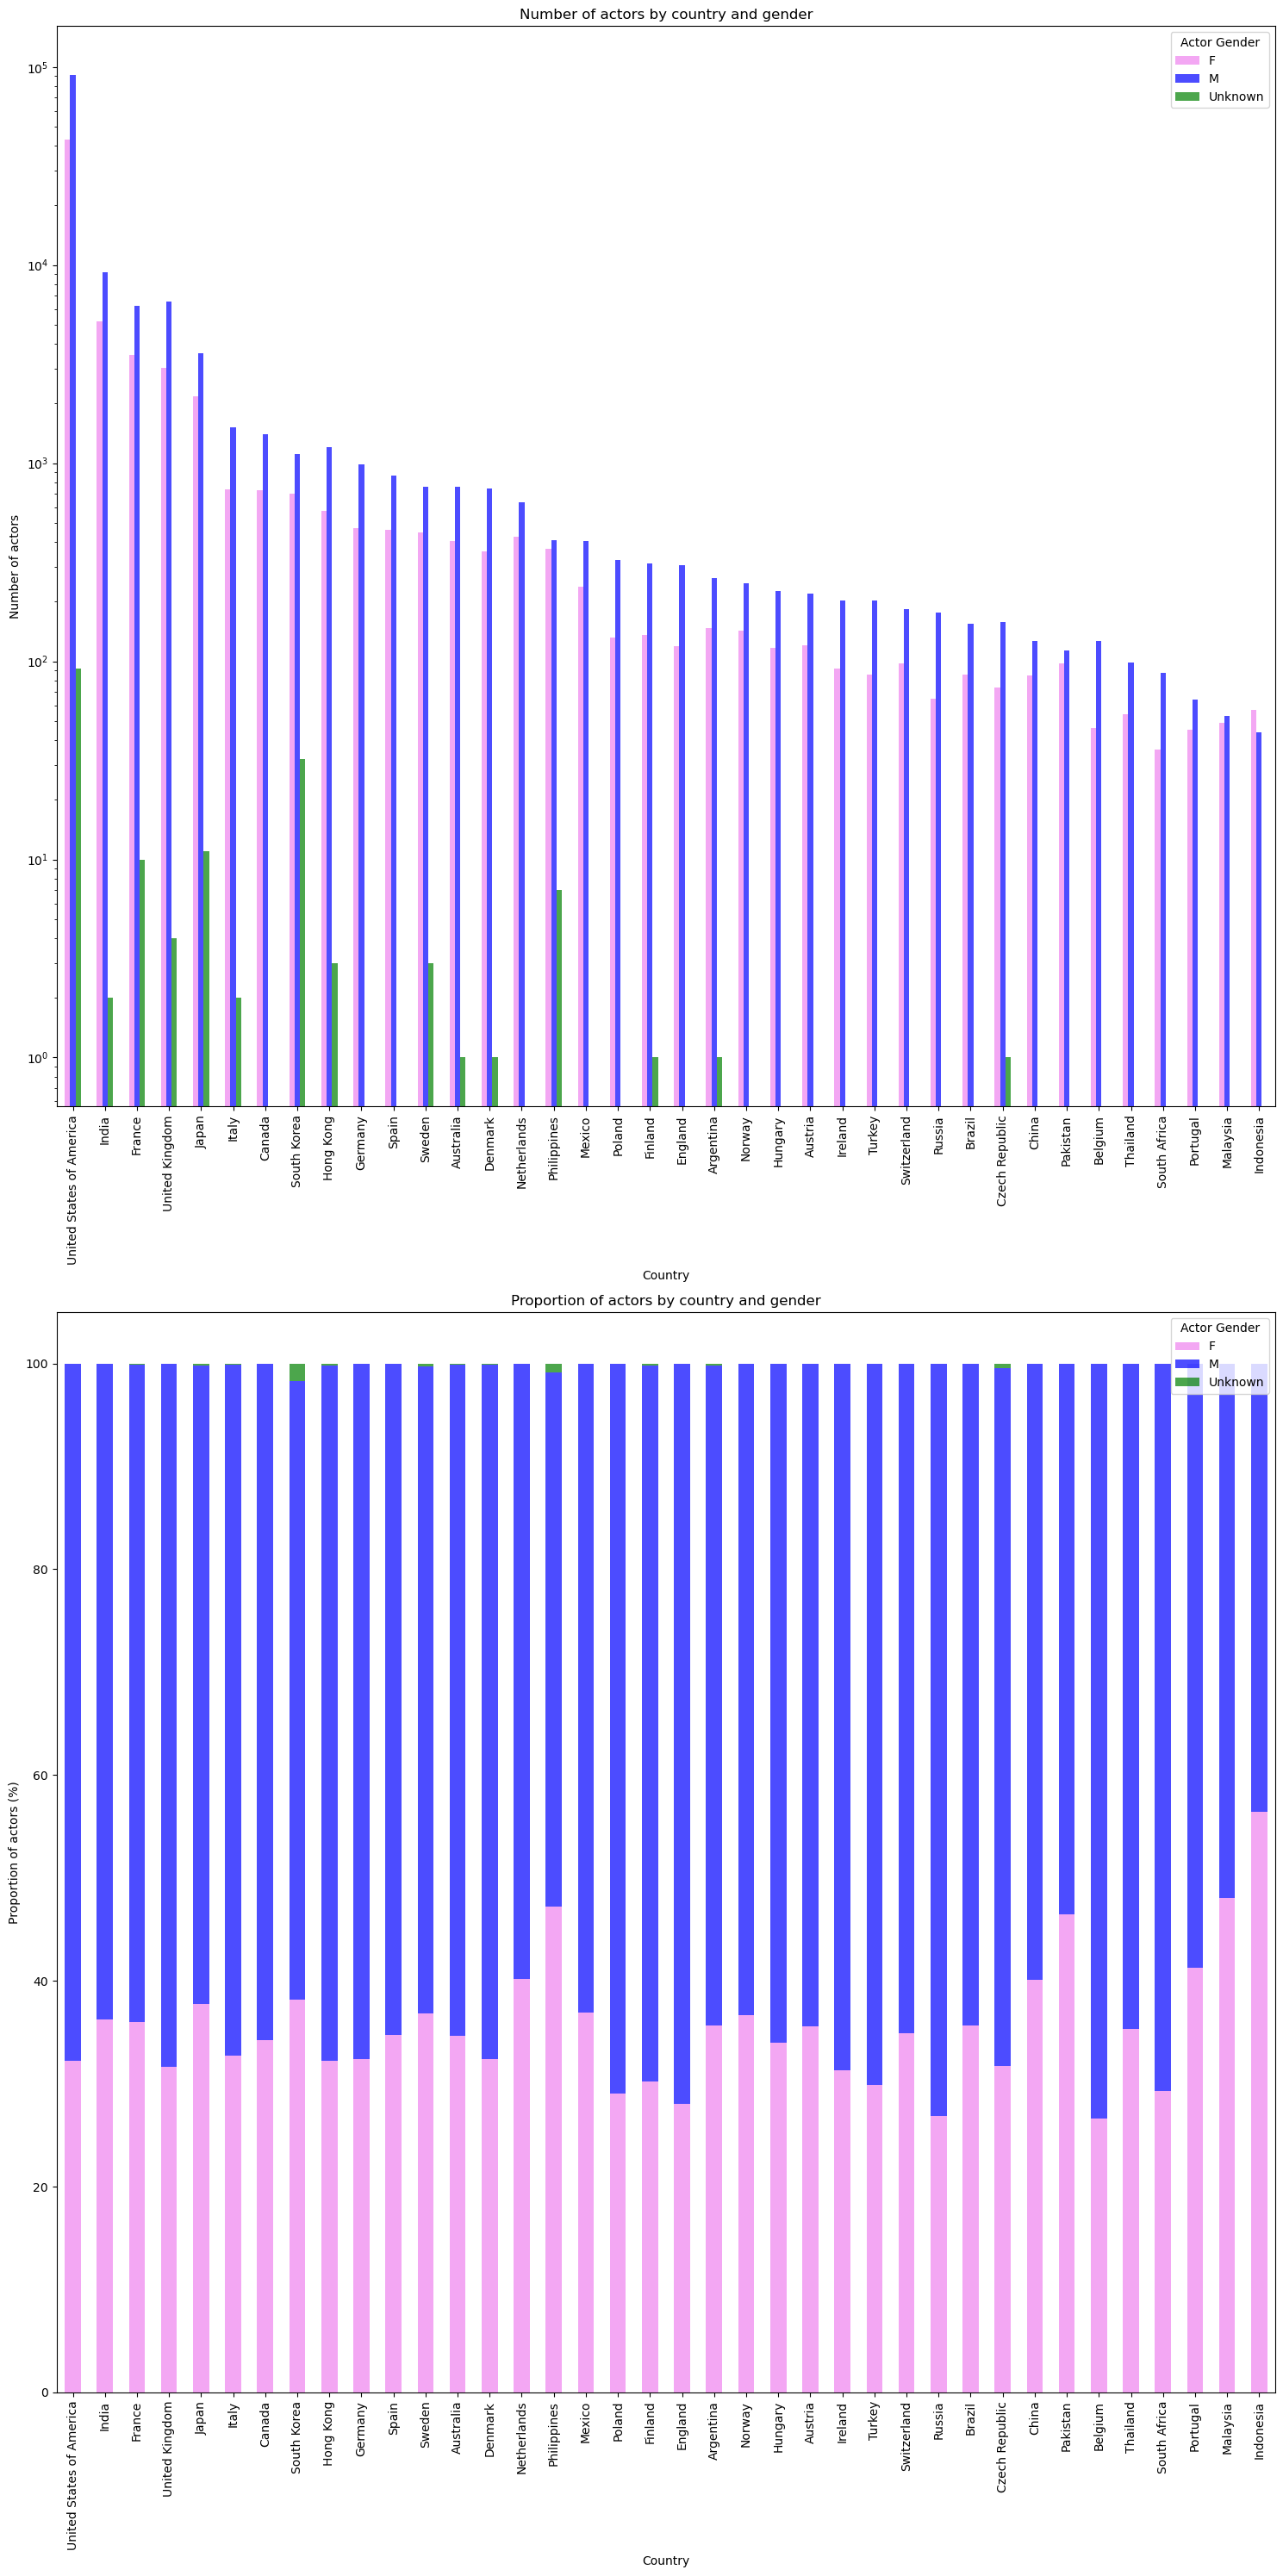

In [10]:
datafirstplot = pd.crosstab(df['Main_country'], df['Actor_gender'])
datafirstplot['Total'] = datafirstplot.sum(axis=1)  
datafirstplot = datafirstplot.sort_values('Total', ascending=False).drop(columns='Total')

datafirstplot_proportion = datafirstplot.div(datafirstplot.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 30))

datafirstplot.plot(kind='bar', stacked=False, ax=ax1, color=['violet', 'blue','green'], alpha=0.7)
ax1.set_xlabel("Country")
ax1.set_ylabel("Number of actors")
ax1.set_title("Number of actors by country and gender")
ax1.set_yscale('log')
ax1.legend(title="Actor Gender")


datafirstplot_proportion.plot(kind='bar', stacked=True, ax=ax2, color=['violet', 'blue','green'], alpha=0.7)
ax2.set_xlabel("Country")
ax2.set_ylabel("Proportion of actors (%)")
ax2.set_title("Proportion of actors by country and gender")
ax2.legend(title="Actor Gender")

plt.tight_layout()
plt.show()

In [11]:
import scipy
b = len(df["Main_country"].unique())
vector=np.zeros([3,b])
a=0
for i in datafirstplot.index: 
    #the value is filled for the corresponding answer for mmlu dataset
    vector[0][a]=datafirstplot['F'].loc[i]
    #the value is filled for the corresponding answer for other dataset
    vector[1][a]=datafirstplot['M'].loc[i]
    vector[2][a]=datafirstplot['Unknown'].loc[i]
    a=a+1
res = scipy.stats.chi2_contingency(vector)
print ( "Taking into account unknown genres")
print("res.statistic:",res.statistic)
print("res.pavalue:",res.pvalue)
print(vector)
vector=np.zeros([2,b])
a=0
for i in datafirstplot.index: 
    #the value is filled for the corresponding answer for mmlu dataset
    vector[0][a]=datafirstplot['F'].loc[i]
    #the value is filled for the corresponding answer for other dataset
    vector[1][a]=datafirstplot['M'].loc[i]
    a=a+1
res = scipy.stats.chi2_contingency(vector)
print ("\nTaking into account only men and women")
print("res.statistic:",res.statistic)
print("res.pavalue:",res.pvalue)




Taking into account unknown genres
res.statistic: 1116.780872841399
res.pavalue: 6.9539607975075704e-186
[[4.3178e+04 5.2060e+03 3.5020e+03 3.0280e+03 2.1850e+03 7.3900e+02
  7.2800e+02 7.0400e+02 5.7600e+02 4.7100e+02 4.6200e+02 4.4500e+02
  4.0300e+02 3.5700e+02 4.2500e+02 3.7100e+02 2.3800e+02 1.3200e+02
  1.3600e+02 1.1900e+02 1.4700e+02 1.4300e+02 1.1700e+02 1.2100e+02
  9.2000e+01 8.6000e+01 9.8000e+01 6.5000e+01 8.6000e+01 7.4000e+01
  8.5000e+01 9.8000e+01 4.6000e+01 5.4000e+01 3.6000e+01 4.5000e+01
  4.9000e+01 5.7000e+01]
 [9.0819e+04 9.1680e+03 6.2220e+03 6.5250e+03 3.5920e+03 1.5180e+03
  1.3990e+03 1.1090e+03 1.2070e+03 9.8400e+02 8.6900e+02 7.6000e+02
  7.5800e+02 7.4300e+02 6.3200e+02 4.0800e+02 4.0600e+02 3.2300e+02
  3.1300e+02 3.0500e+02 2.6400e+02 2.4700e+02 2.2700e+02 2.1900e+02
  2.0200e+02 2.0200e+02 1.8300e+02 1.7700e+02 1.5500e+02 1.5800e+02
  1.2700e+02 1.1300e+02 1.2700e+02 9.9000e+01 8.7000e+01 6.4000e+01
  5.3000e+01 4.4000e+01]
 [9.2000e+01 2.0000e+00 1.000

The null hypothesis is : There is no significant difference in the distribution of women, men and unknown in movies according to the country they were produce. Since the p-value is almost 0, it is way smaller than 0.05 and therefore the null hypothesis is rejected in favor of "there is a significant difference in the distribution of women, men and umknown according to the country the film was produced". Therefore more test and investigation should be done to understand the distribution of correct answers because the alternative hypothesis cannot be accepted as a truth.

Main_country
Indonesia      56.435644
Malaysia       48.039216
Philippines    47.201018
Pakistan       46.445498
Portugal       41.284404
Name: F, dtype: float64


Main_country
Belgium         26.589595
Russia          26.859504
England         28.066038
Poland          29.010989
South Africa    29.268293
Name: F, dtype: float64

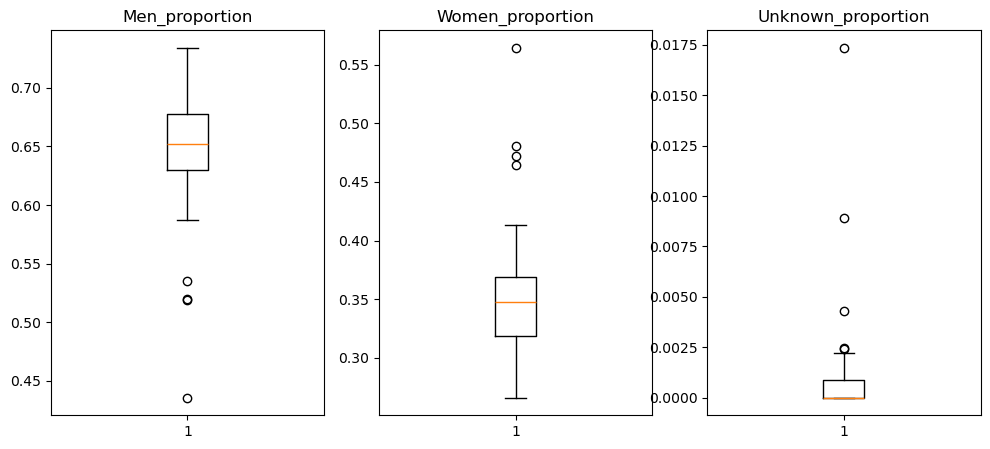

In [13]:

'''
#here "a" is created to have a number that follows the position during iteration
a=0
# an iteration is made on the answer
for i in Answers_datasetmmlu.index:
    #the value is filled for the corresponding answer for mmlu dataset
    vector[a][0]=Answers_datasetmmlu.loc[i]
    #the value is filled for the corresponding answer for other dataset
    vector[a][1]=Answers_datasetother.loc[i]
    a=a+1
#then the chi-square thest is performed using the "chi2_contingency" function
res = scipy.stats.chi2_contingency(vector)
print("res.statistic:",res.statistic)
print("res.pavalue:",res.pvalue)
'''
datafirstplot_proportion.describe()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

ax1.boxplot(datafirstplot_proportion['M']/100)
ax1.set_title("Men_proportion")

ax2.boxplot(datafirstplot_proportion['F']/100)
ax2.set_title("Women_proportion")

ax3.boxplot(datafirstplot_proportion['Unknown']/100)
ax3.set_title("Unknown_proportion")

women_top5 = datafirstplot_proportion['F'].nlargest(5)
print(women_top5)
women_less5 = datafirstplot_proportion['F'].nsmallest(5)
women_less5


In [14]:

'''
dec= dataheat.groupby(["Decade", "Main_country",'Actor_gender']).Decade.count()
dew = dataheat[dataheat.Actor_gender == "F"].groupby(["Decade", "Main_country"]).Decade.count()
dec
'''
def gen(year):
    if 1900<year<=1927:
        return "Greatest_generation"
    if 1927<year<=1945:
        return "Silent_generation"
    if 1945<year<=1965:
        return "Babyboomers_generation"
    if 1965<year<=1980:
        return "X_generation"
    if 1980<year<=1996:
        return "Millenials"
    if 1996<year<= 2012:
        return "Z_generation"
    if year>2012:
        return "Alpha_generation"

my_order = ["Alpha_generation", "Z_generation", "Millenials", "X_generation","Babyboomers_generation","Silent_generation","Greatest_generation"]

df['generation'] = df['Movie_release_date'].apply(gen)
df['generation'] = df['generation'].astype("category")
df['generation'].cat.reorder_categories(my_order, ordered= True)


0         Z_generation
1         Z_generation
2         Z_generation
3         Z_generation
4         Z_generation
              ...     
199281      Millenials
199282      Millenials
199283      Millenials
199284      Millenials
199285      Millenials
Name: generation, Length: 195883, dtype: category
Categories (7, object): ['Alpha_generation' < 'Z_generation' < 'Millenials' < 'X_generation' < 'Babyboomers_generation' < 'Silent_generation' < 'Greatest_generation']

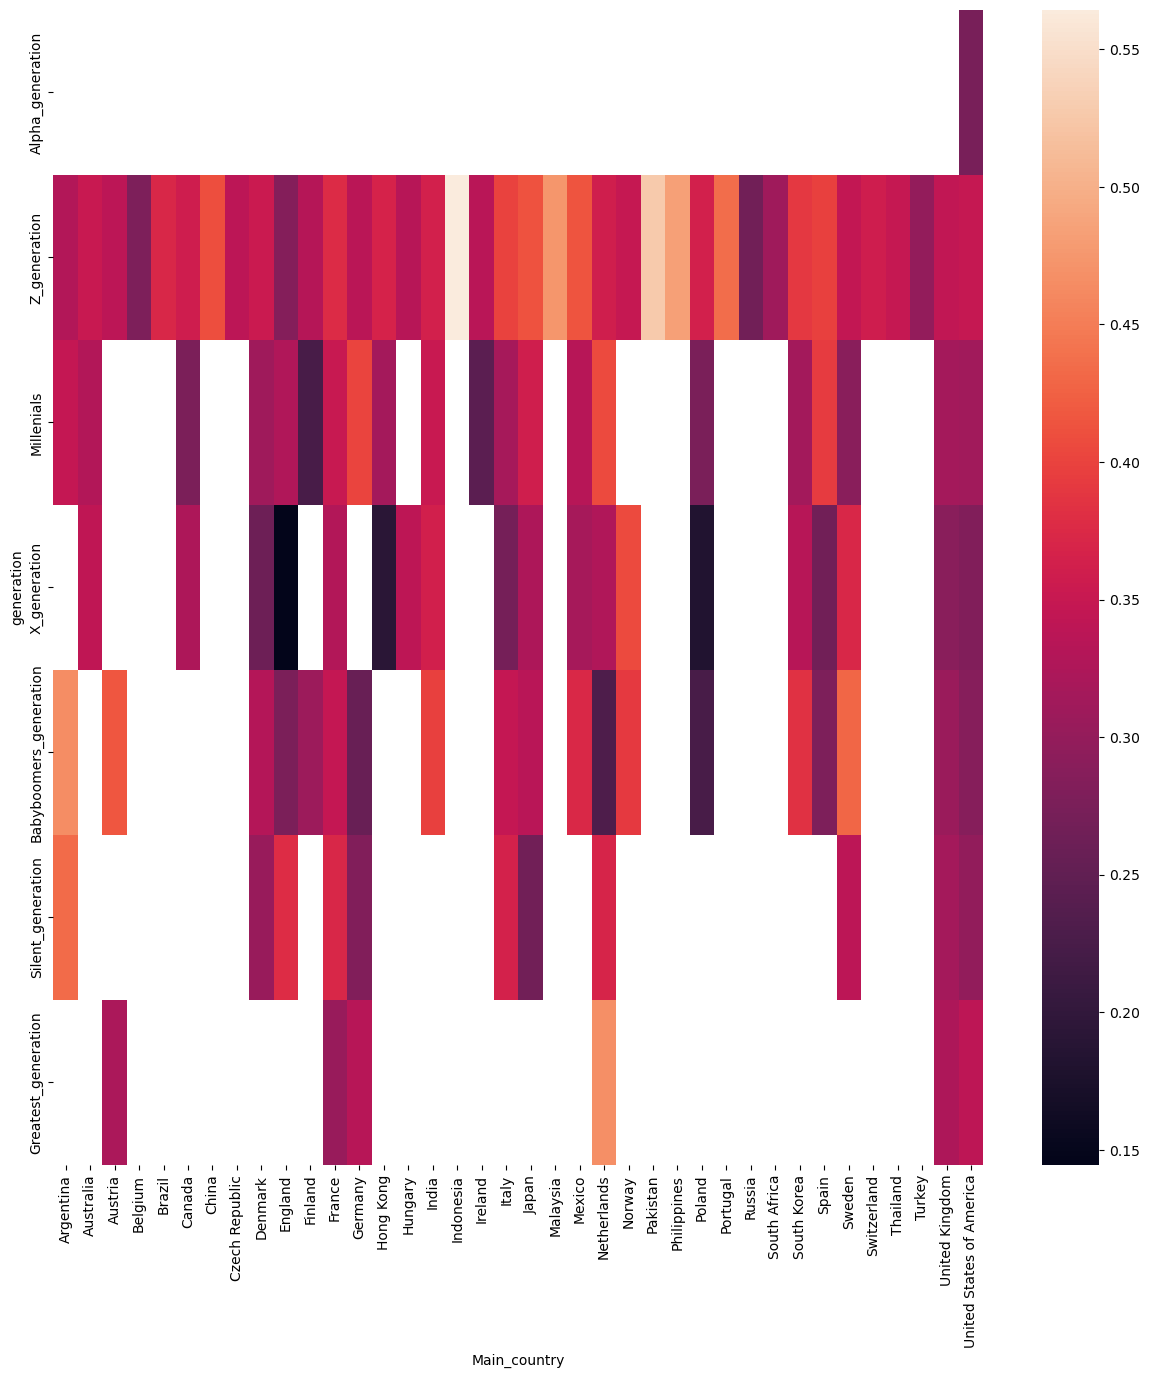

In [15]:
dataheat = df
dataheat_w = dataheat[dataheat.Actor_gender =="F"]
dataheat = pd.crosstab(dataheat['generation'],dataheat['Main_country'])
dataheat_w =  pd.crosstab(dataheat_w['generation'],dataheat_w['Main_country'])
mask = (dataheat>=50)
dataheat = dataheat[mask].fillna(0)
dataheat_w = dataheat_w[mask].fillna(0)
prop = dataheat_w/ dataheat
prop = prop.reindex(my_order)
plt.figure(figsize = (15,15))
sns.heatmap(prop, annot=False)

plt.show()


C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\521723798.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europa['generation'] = europa['Movie_release_date'].apply(gen)


83


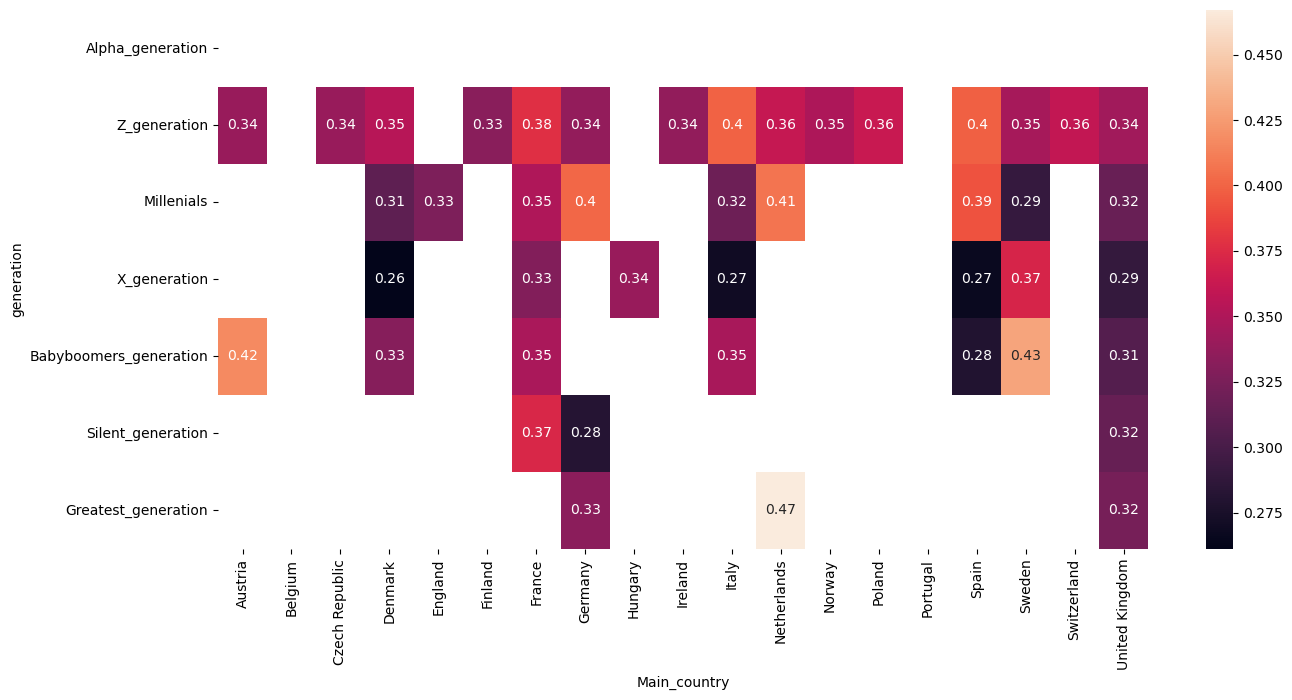

In [75]:
'''europa2 = europa.map(lambda x: x if x >=20 else 0)
europa2'''
'''mask = (europa>25)
europatest = europa_w[mask].fillna(0)
europatest'''
europa = df[df['Main_country'].isin(Europa)]

europa['generation'] = europa['Movie_release_date'].apply(gen)
print(europa[(europa.Main_country=="England") & (europa.generation == "X_generation")].Actor_gender.count())
europa_w = europa[europa.Actor_gender =="F"]
europa = pd.crosstab(europa['generation'],europa['Main_country'])
europa_w =  pd.crosstab(europa_w['generation'],europa_w['Main_country'])


mask = (europa>=100)
europa = europa[mask].fillna(0)
europa_w = europa_w[mask].fillna(0)

prop = europa_w/ europa

prop = prop.reindex(my_order)
plt.figure(figsize = (15,7))
sns.heatmap(prop, annot=True)
plt.show()



In [61]:
def heatmap(region):
    reg = df[df['Main_country'].isin(region)]
    reg['generation'] = reg['Movie_release_date'].apply(gen)
    reg_w = reg[reg.Actor_gender =="F"]
    reg = pd.crosstab(reg['generation'],reg['Main_country'])
    reg_w =  pd.crosstab(reg_w['generation'],reg_w['Main_country'])
    mask = (reg>=100)
    reg = reg[mask].fillna(0)
    reg_w = reg_w[mask].fillna(0)
    prop = reg_w/ reg
    prop = prop.reindex(my_order)
    plt.figure(figsize = (15,7))
    sns.heatmap(prop, annot=True)
    plt.show()
'''
def heatmap2(region):
    reg = df[df['Main_country'].isin(region)]
    reg['generation'] = reg['Movie_release_date'].apply(gen)  
    reg_w = reg[reg.Actor_gender =="F"]
    reg = pd.crosstab(reg['generation'],reg['Main_country'])
    reg_w =  pd.crosstab(reg_w['generation'],reg_w['Main_country'])'''

'\ndef heatmap2(region):\n    reg = df[df[\'Main_country\'].isin(region)]\n    reg[\'generation\'] = reg[\'Movie_release_date\'].apply(gen)  \n    reg_w = reg[reg.Actor_gender =="F"]\n    reg = pd.crosstab(reg[\'generation\'],reg[\'Main_country\'])\n    reg_w =  pd.crosstab(reg_w[\'generation\'],reg_w[\'Main_country\'])'

C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\3741246027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['generation'] = reg['Movie_release_date'].apply(gen)


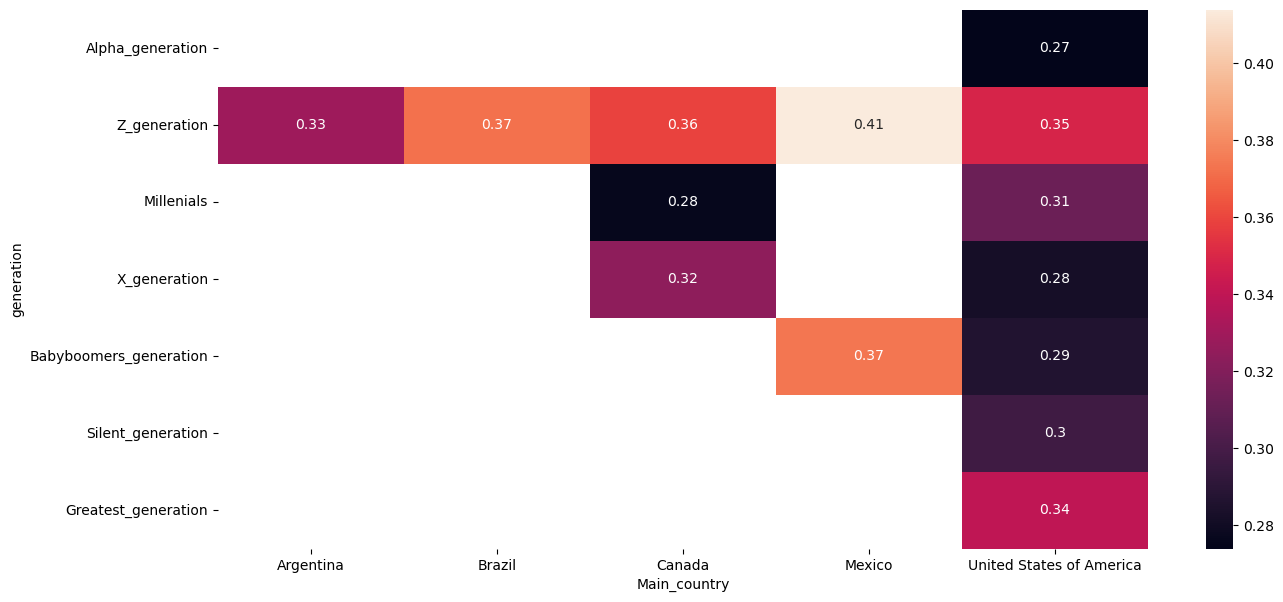

In [63]:
heatmap(America)

C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\3741246027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['generation'] = reg['Movie_release_date'].apply(gen)


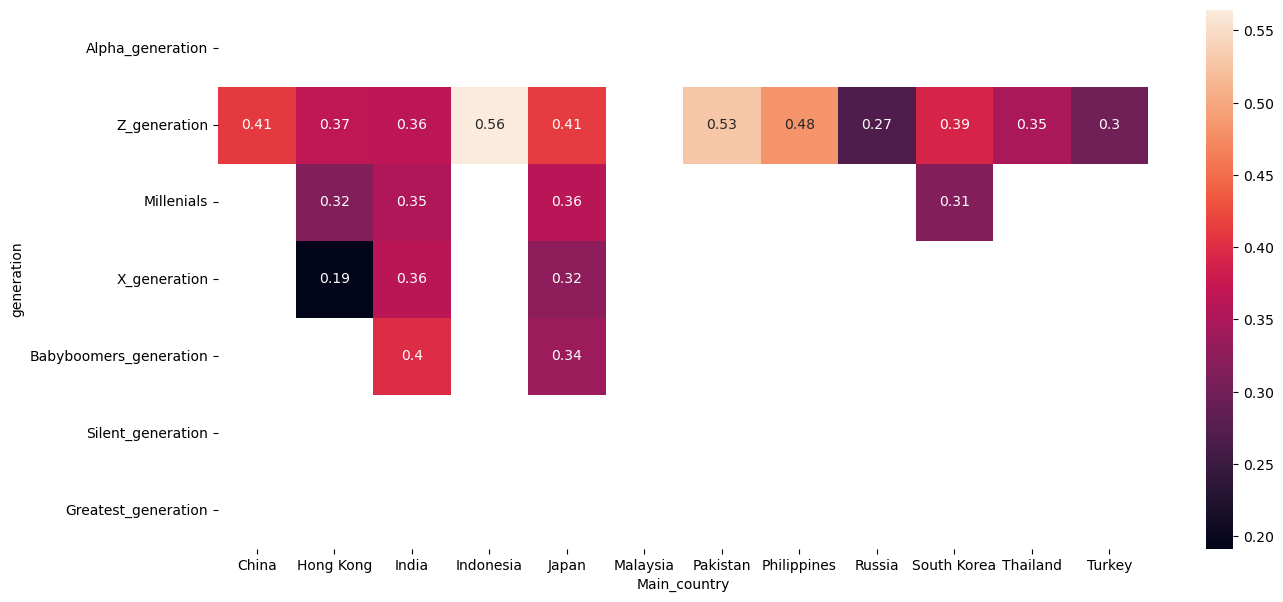

In [64]:
heatmap(Asia)

C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\3741246027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['generation'] = reg['Movie_release_date'].apply(gen)


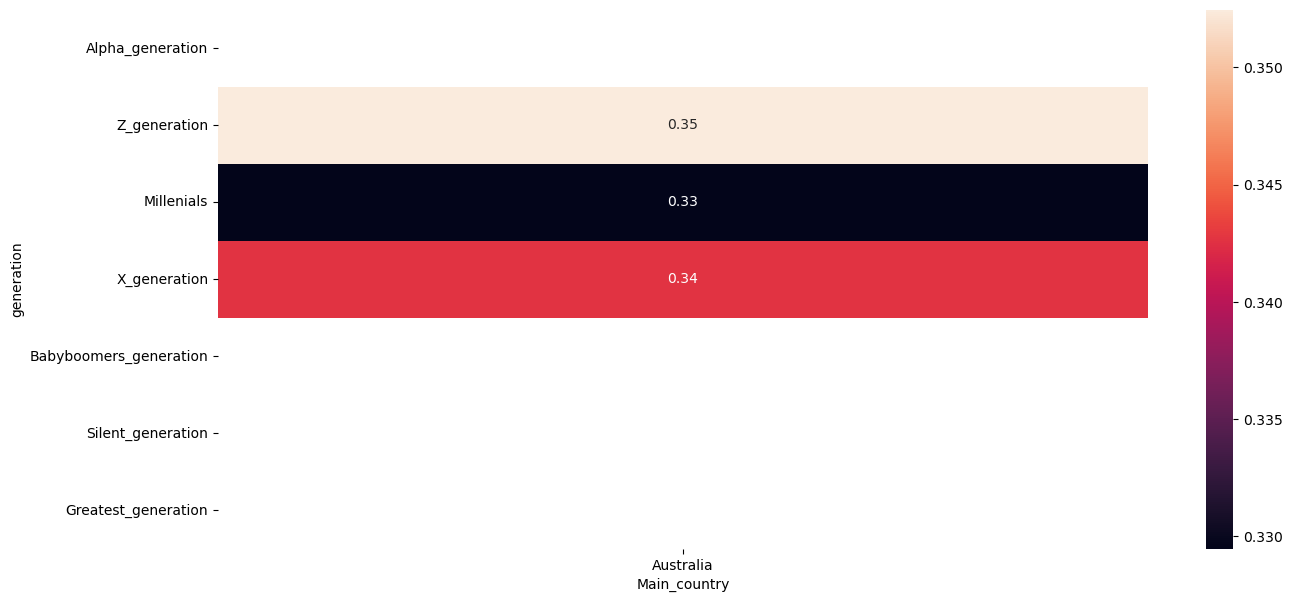

In [65]:
heatmap(Oceania)

C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\3741246027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['generation'] = reg['Movie_release_date'].apply(gen)
C:\Users\cricl\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\cricl\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


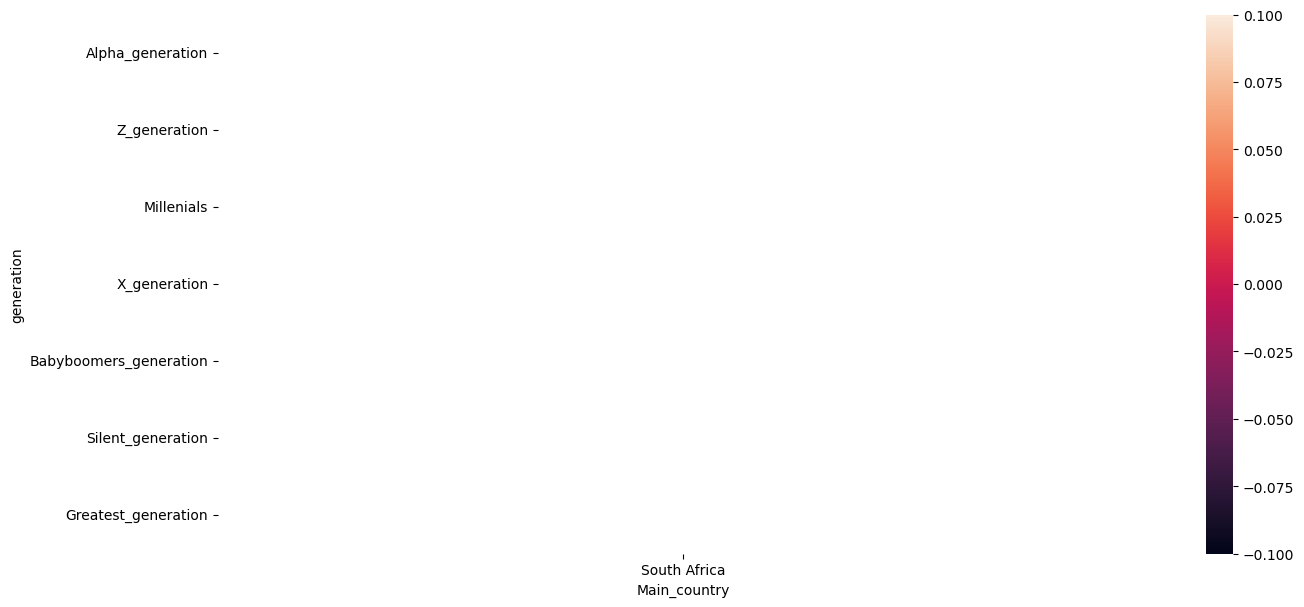

In [66]:
heatmap(Africa)

In [67]:
#heatmap(Deadcountries)

C:\Users\cricl\AppData\Local\Temp\ipykernel_17064\3741246027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg['generation'] = reg['Movie_release_date'].apply(gen)


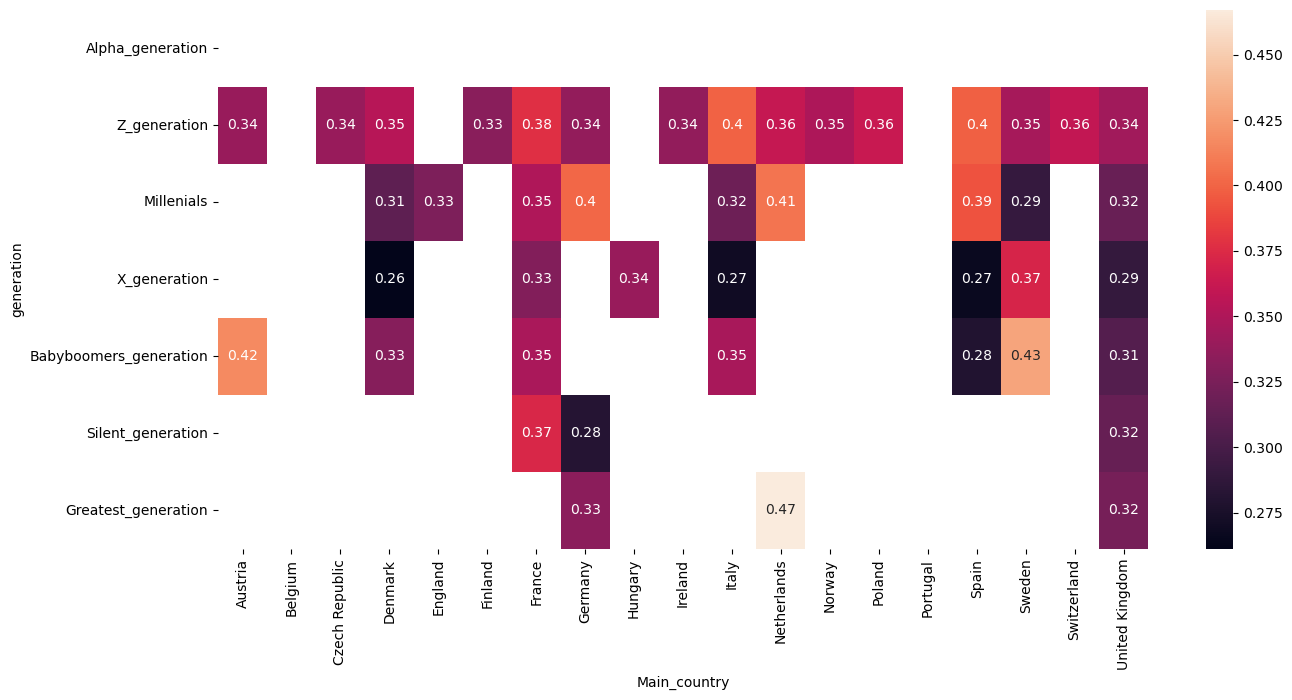

In [68]:
heatmap(Europa)